<a href="https://colab.research.google.com/github/Trangng320/Tri-Tue-Nhan-Tao/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_c%C3%A1c_lo%E1%BA%A1i_g%E1%BA%A1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [56]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/Rice

/content/drive/MyDrive/Colab Notebooks/BTVN/Rice


In [57]:
# Tạo ra class ImageDataGenerator để chỉnh ảnh 
train_datagen=ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [58]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Rice/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 472 images belonging to 5 classes.


In [59]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Rice/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 50 images belonging to 5 classes.


In [60]:
training_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [61]:
validation.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [64]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_43 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [65]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=10,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/10
15/15 [==============================] - 130s 5s/step - loss: 1.1267 - accuracy: 0.5869 - val_loss: 0.6877 - val_accuracy: 0.7200
Epoch 2/10
15/15 [==============================] - 75s 5s/step - loss: 0.5833 - accuracy: 0.7606 - val_loss: 0.6836 - val_accuracy: 0.7000
Epoch 3/10
15/15 [==============================] - 76s 5s/step - loss: 0.5163 - accuracy: 0.8072 - val_loss: 0.5324 - val_accuracy: 0.7800
Epoch 4/10
15/15 [==============================] - 74s 5s/step - loss: 0.4915 - accuracy: 0.8093 - val_loss: 0.2884 - val_accuracy: 0.8800
Epoch 5/10
15/15 [==============================] - 77s 5s/step - loss: 0.4310 - accuracy: 0.8242 - val_loss: 0.3865 - val_accuracy: 0.7800
Epoch 6/10
15/15 [==============================] - 79s 5s/step - loss: 0.3352 - accuracy: 0.8708 - val_loss: 0.2878 - val_accuracy: 0.8400
Epoch 7/10
15/15 [==============================] - 82s 6s/step - loss: 0.3999 - accuracy: 0.8602 - val_loss: 0.3329 - val_accuracy: 0.8400
Epoch 8/10
15/15 [=

In [67]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.32088395953178406
Train Accuracy 0.8601694703102112


In [68]:
# Lưu lại
model.save("Rice.h5")

In [69]:
# Tải mô hình 
model_CNN=load_model('Rice.h5')

1/1 [==============================] - 0s 149ms/step
Basmati (1).jpg
Basmati


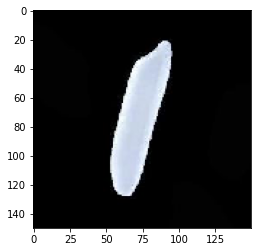

1/1 [==============================] - 0s 62ms/step
Basmati (2).jpg
Basmati


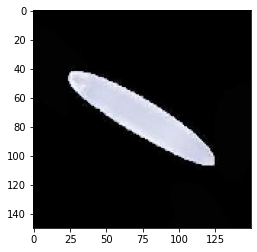

1/1 [==============================] - 0s 63ms/step
Basmati (3).jpg
Basmati


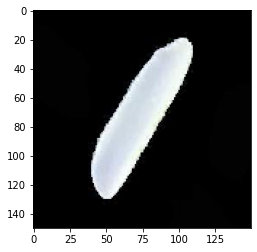

1/1 [==============================] - 0s 58ms/step
Arborio (3).jpg
Karacadag


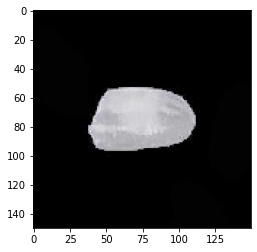

1/1 [==============================] - 0s 58ms/step
Arborio (2).jpg
Karacadag


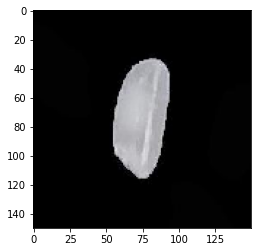

1/1 [==============================] - 0s 57ms/step
Ipsala (3).jpg
Ipsala


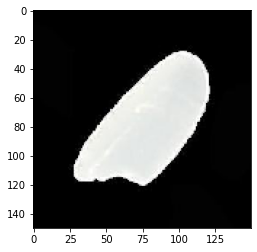

1/1 [==============================] - 0s 58ms/step
Ipsala (1).jpg
Ipsala


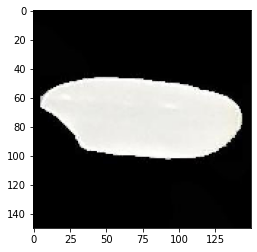

1/1 [==============================] - 0s 58ms/step
Ipsala (2).jpg
Ipsala


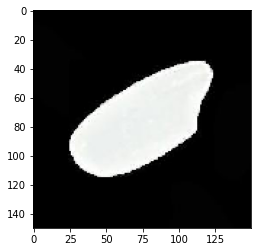

1/1 [==============================] - 0s 58ms/step
Jasmine (1).jpg
Jasmine


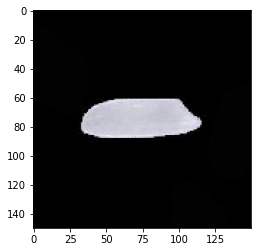

1/1 [==============================] - 0s 59ms/step
Jasmine (2).jpg
Jasmine


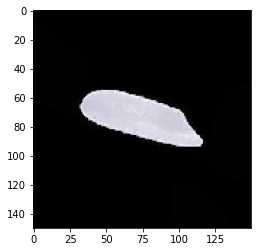

1/1 [==============================] - 0s 59ms/step
Jasmine (3).jpg
Jasmine


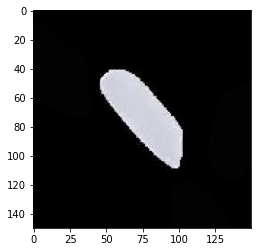

1/1 [==============================] - 0s 69ms/step
Karacadag (6).jpg
Karacadag


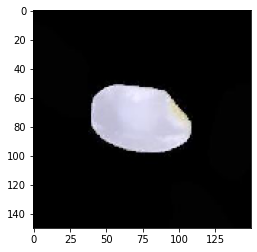

1/1 [==============================] - 0s 61ms/step
Karacadag (7).jpg
Karacadag


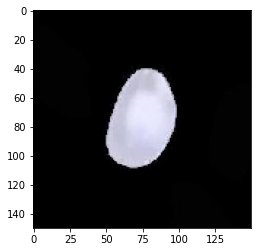

1/1 [==============================] - 0s 61ms/step
Karacadag (8).jpg
Karacadag


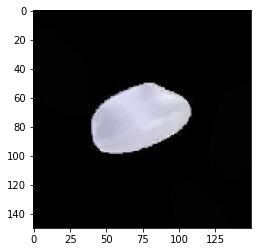

In [70]:
Test = "/content/drive/MyDrive/Colab Notebooks/BTVN/Rice/Test"
for i in os.listdir(Test):
  img=load_img(Test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Arborio'
  if round(result[0][1])==1:
    prediction='Basmati'
  if round(result[0][2])==1:
    prediction='Ipsala'
  if round(result[0][3])==1:
    prediction='Jasmine'
  if round(result[0][4])==1:
    prediction='Karacadag'
  print(i)
  print(prediction)
  plt.show()

In [1]:
!jupyter nbconvert --to html "/content/Nhận_diện_các_loại_gạo.ipynb"

[NbConvertApp] Converting notebook /content/Nhận_diện_các_loại_gạo.ipynb to html
[NbConvertApp] Writing 604587 bytes to /content/Nhận_diện_các_loại_gạo.html
